In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

df = pd.read_csv('../../data/GSE218462_raw_counts_GRCh38.p13_NCBI.tsv', sep='\t')
df = df.T
df.columns = df.iloc[0]
df = df[1:]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data)

scaled_df.columns = df.columns
scaled_df.index = df.index
unedited = ['GSM6745632', 'GSM6745633', 'GSM6745634', 'GSM6745635', 'GSM6745636', 'GSM6745637']
scaled_df['Edited (1) or Unedited (0)'] = scaled_df.index.map(lambda gene: 0 if gene in unedited else 1)
mechanisms = {
    "BE4": ["GSM6745599", "GSM6745600", "GSM6745601", "GSM6745611", "GSM6745612", "GSM6745613"],
    "ABE8": ["GSM6745602", "GSM6745603", "GSM6745604", "GSM6745614", "GSM6745615", "GSM6745616"],
    "Cas9": ["GSM6745605", "GSM6745606", "GSM6745607", "GSM6745617", "GSM6745618", "GSM6745619"],
    "Utelectro": ["GSM6745608", "GSM6745609", "GSM6745610", "GSM6745620", "GSM6745621", "GSM6745622"],
    "dCas9": ["GSM6745623", "GSM6745624", "GSM6745625"],
    "BE4alone": ["GSM6745626", "GSM6745627", "GSM6745628"],
    "ABE8alone": ["GSM6745629", "GSM6745630", "GSM6745631"],
    "UT": ["GSM6745632", "GSM6745633", "GSM6745634", "GSM6745635", "GSM6745636", "GSM6745637"]
}

# Inverting the dictionary to map gene code to its corresponding key
mechanism_map = {gene: mechanism for mechanism, genes in mechanisms.items() for gene in genes}

scaled_df['editing mechanism'] = scaled_df.index.map(mechanism_map)

# print(scaled_df)

txt_file_path = '../EDA_sj/relevant_genes_1.6_250.txt'
with open(txt_file_path, 'r') as file:
    txt_data = file.read()

soham_gene_ids = txt_data.split(',')

column_names = scaled_df.columns.tolist()

column_names = [str(col) for col in scaled_df.columns.tolist()]
filtered_column_names = [col for col in scaled_df.columns if str(col) in soham_gene_ids]
scaled_df = scaled_df[filtered_column_names + ['Edited (1) or Unedited (0)', 'editing mechanism']]

# Output the filtered DataFrame
print(scaled_df)

GeneID      113219467     57801      9636  100288175  102465434  109623456  \
GSM6745599  -0.158632  1.070933  1.152150   0.499194  -0.342997  -0.697982   
GSM6745600   1.379276  0.767235  0.761592  -0.765431  -0.342997  -0.697982   
GSM6745601   5.355088  3.457126  2.062135   1.706335  -0.342997  -0.697982   
GSM6745602   2.002351  0.897391  0.336385  -0.075635  -0.342997   0.697982   
GSM6745603   0.679553  1.070933  0.673147   0.614160  -0.342997   0.697982   
GSM6745604  -0.213027  1.548171  0.828458  -0.018153  -0.342997  -0.697982   
GSM6745605   0.009500  0.810621 -0.304008   1.016540  -0.342997  -0.697982   
GSM6745606  -0.393521 -0.274013 -0.724960  -0.650465  -0.342997  -0.697982   
GSM6745607  -0.274840  0.289997 -0.605817   0.384228  -0.342997  -0.697982   
GSM6745609  -0.334181  1.070933 -0.549893   1.591370  -0.342997  -0.697982   
GSM6745610  -0.339126  2.329107 -0.600042   0.211779  -0.342997   0.697982   
GSM6745611  -0.299565 -0.577710  0.256450  -0.305567  -0.342997 

In [2]:
tsv_file_path = '../../data/Human.GRCh38.p13.annot.tsv'
tsv_df = pd.read_csv(tsv_file_path, sep='\t')

tsv_df

/var/folders/n1/ddw6p35j0310zh6cql00y29r0000gn/T/ipykernel_67196/4125254461.py:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  tsv_df = pd.read_csv(tsv_file_path, sep='\t')


,GeneID,Symbol,Description,Synonyms,GeneType,EnsemblGeneID,Status,ChrAcc,ChrStart,ChrStop,Orientation,Length,GOFunctionID,GOProcessID,GOComponentID,GOFunction,GOProcess,GOComponent
0,100287102,DDX11L1,DEAD/H-box helicase 11 like 1 (pseudogene),NaN,pseudo,ENSG00000290825,active,NC_000001.11,11874,14409,positive,1652,NaN,NaN,NaN,NaN,NaN,NaN
1,653635,WASH7P,"WASP family homolog 7, pseudogene",FAM39F|WASH5P,pseudo,NaN,active,NC_000001.11,14362,29370,negative,1769,NaN,NaN,NaN,NaN,NaN,NaN
2,102466751,MIR6859-1,microRNA 6859-1,hsa-mir-6859-1,ncRNA,ENSG00000278267,active,NC_000001.11,17369,17436,negative,68,NaN,NaN,NaN,NaN,NaN,NaN
3,107985730,MIR1302-2HG,MIR1302-2 host gene,NaN,ncRNA,NaN,active,NC_000001.11,29926,31295,positive,538,NaN,NaN,NaN,NaN,NaN,NaN
4,100302278,MIR1302-2,microRNA 1302-2,MIRN1302-2|hsa-mir-1302-2,ncRNA,ENSG00000284332,active,NC_000001.11,30366,30503,positive,138,NaN,GO:0035195,NaN,NaN,miRNA-mediated gene silencing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,4541,ND6,NADH dehydrogenase subunit 6,MTND6,protein-coding,NaN,active,NC_012920.1,14149,14673,negative,525,GO:0008137,GO:0006120///GO:0009060///GO:0032981///GO:0035...,GO:0005739///GO:0005743///GO:0005747,NADH dehydrogenase (ubiquinone) activity,"mitochondrial electron transport, NADH to ubiq...",mitochondrion///mitochondrial inner membrane//...
39372,4556,TRNE,tRNA-Glu,MTTE,tRNA,NaN,active,NC_012920.1,14674,14742,negative,69,NaN,NaN,NaN,NaN,NaN,NaN
39373,4519,CYTB,cytochrome b,MTCYB,protein-coding,NaN,active,NC_012920.1,14747,15887,positive,1141,GO:0008121///GO:0046872,GO:0006122///GO:0045333///GO:1902600,GO:0005739///GO:0005743///GO:0005750///GO:0016020,ubiquinol-cytochrome-c reductase activity///me...,"mitochondrial electron transport, ubiquinol to...",mitochondrion///mitochondrial inner membrane//...
39374,4576,TRNT,tRNA-Thr,MTTT,tRNA,NaN,active,NC_012920.1,15888,15953,positive,66,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
metadata_file_path = "../../data/Human.GRCh38.p13.annot.tsv"
metadata = pd.read_csv(metadata_file_path, sep='\t')

transposed_data = scaled_df.T
transposed_data = transposed_data.reset_index()
transposed_data.columns.values[0] = 'GeneID'


merged_data = transposed_data.merge(metadata, on='GeneID', how='left').set_index('GeneID')
merged_data = merged_data.iloc[:39378]

print("Merged Data (first few rows):")

# Optionally, save to a new file
output_file_path = "merged_gene_expression_with_metadata.csv"
merged_data.to_csv(output_file_path)
print(merged_data.columns)
# print(f"Merged data saved to {output_file_path}")

Merged Data (first few rows):
Index(['GSM6745599', 'GSM6745600', 'GSM6745601', 'GSM6745602', 'GSM6745603',
       'GSM6745604', 'GSM6745605', 'GSM6745606', 'GSM6745607', 'GSM6745609',
       'GSM6745610', 'GSM6745611', 'GSM6745612', 'GSM6745613', 'GSM6745614',
       'GSM6745615', 'GSM6745616', 'GSM6745617', 'GSM6745618', 'GSM6745619',
       'GSM6745620', 'GSM6745621', 'GSM6745622', 'GSM6745623', 'GSM6745624',
       'GSM6745625', 'GSM6745626', 'GSM6745627', 'GSM6745628', 'GSM6745629',
       'GSM6745630', 'GSM6745631', 'GSM6745632', 'GSM6745633', 'GSM6745634',
       'GSM6745635', 'GSM6745636', 'GSM6745637', 'Symbol', 'Description',
       'Synonyms', 'GeneType', 'EnsemblGeneID', 'Status', 'ChrAcc', 'ChrStart',
       'ChrStop', 'Orientation', 'Length', 'GOFunctionID', 'GOProcessID',
       'GOComponentID', 'GOFunction', 'GOProcess', 'GOComponent'],
      dtype='object')


/var/folders/n1/ddw6p35j0310zh6cql00y29r0000gn/T/ipykernel_67196/3509068322.py:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(metadata_file_path, sep='\t')


In [4]:
# merged_data = merged_data.iloc[:, :-6]
# merged_data = merged_data.drop(columns=['EnsemblGeneID'])
merged_data
output_file_path = "testing.csv"
merged_data.to_csv(output_file_path)
print(merged_data.columns)

Index(['GSM6745599', 'GSM6745600', 'GSM6745601', 'GSM6745602', 'GSM6745603',
       'GSM6745604', 'GSM6745605', 'GSM6745606', 'GSM6745607', 'GSM6745609',
       'GSM6745610', 'GSM6745611', 'GSM6745612', 'GSM6745613', 'GSM6745614',
       'GSM6745615', 'GSM6745616', 'GSM6745617', 'GSM6745618', 'GSM6745619',
       'GSM6745620', 'GSM6745621', 'GSM6745622', 'GSM6745623', 'GSM6745624',
       'GSM6745625', 'GSM6745626', 'GSM6745627', 'GSM6745628', 'GSM6745629',
       'GSM6745630', 'GSM6745631', 'GSM6745632', 'GSM6745633', 'GSM6745634',
       'GSM6745635', 'GSM6745636', 'GSM6745637', 'Symbol', 'Description',
       'Synonyms', 'GeneType', 'EnsemblGeneID', 'Status', 'ChrAcc', 'ChrStart',
       'ChrStop', 'Orientation', 'Length', 'GOFunctionID', 'GOProcessID',
       'GOComponentID', 'GOFunction', 'GOProcess', 'GOComponent'],
      dtype='object')


In [5]:
merged_data_nulls = merged_data['Description'].isnull().sum() + merged_data['Description'].str.contains('uncharacterized', case=False, na=False).sum()
merged_data_nulls

np.int64(1221)

In [6]:
# Delete any genes with missing descriptions
merged_data = merged_data.dropna(subset=['Description'])
print(f"Number of rows: {merged_data.shape[0]}, Number of columns: {merged_data.shape[1]}")
merged_data.reset_index(inplace=True) # Apparently, I had GeneID as the index, so I reset it to a column cuz it's easier to work with
print(merged_data)

Number of rows: 4656, Number of columns: 55
         GeneID GSM6745599 GSM6745600 GSM6745601 GSM6745602 GSM6745603  \
0     113219467  -0.158632   1.379276   5.355088   2.002351   0.679553   
1         57801   1.070933   0.767235   3.457126   0.897391   1.070933   
2          9636    1.15215   0.761592   2.062135   0.336385   0.673147   
3     100288175   0.499194  -0.765431   1.706335  -0.075635    0.61416   
4     102465434  -0.342997  -0.342997  -0.342997  -0.342997  -0.342997   
...         ...        ...        ...        ...        ...        ...   
4651  105377243  -0.222988  -0.222988  -0.222988  -0.222988  -0.222988   
4652  107987359  -0.164399  -0.164399  -0.164399  -0.164399  -0.164399   
4653       4572  -0.135784   0.567824   3.460437    1.42779   2.131398   
4654       4512  -0.237304   1.302546   5.055768   2.327118   0.856884   
4655       4574  -0.162382   1.353526    5.39109   1.941426   0.658735   

     GSM6745604 GSM6745605 GSM6745606 GSM6745607  ...  ChrStart   C

In [7]:
expression_cols = merged_data.columns[1:39]
expression_data = merged_data[expression_cols].apply(pd.to_numeric, errors='coerce')

pca_target_variance = 0.75
pca_full = PCA()
expression_data_filled = expression_data.apply(lambda row: row.bfill().ffill(), axis=1)
nan_counts = expression_data.isna().sum().sum()
nan_counts

pca_full.fit(expression_data)

# Determine number of components needed to explain 75% variance
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()
n_components_75 = np.argmax(cumulative_variance >= pca_target_variance) + 1

# Apply PCA with the determined number of components
pca_final = PCA(n_components=n_components_75)
pca_result_final = pca_final.fit_transform(expression_data)

# Retrieve top contributing genes for each principal component
components_df = pd.DataFrame(
    pca_final.components_,
    columns=merged_data['GeneID'][:expression_data.shape[1]],
    index=[f"PC{i+1}" for i in range(n_components_75)]
)

def get_relevant_genes_with_contribution(pc, cumulative_threshold=0.9):
    # Absolute loadings for the specified principal component
    loadings = components_df.iloc[pc-1].abs().sort_values(ascending=False)

    # Calculate cumulative variance contribution by each gene
    cumulative_variance = loadings.cumsum() / loadings.sum()

    # Select genes up to the cumulative threshold
    relevant_genes = loadings[cumulative_variance <= cumulative_threshold]

    # Calculate the contribution percentage for each gene
    contribution_percentages = (relevant_genes / loadings.sum()) * 100

    return pd.DataFrame({
        'Loading': relevant_genes,
        'Contribution (%)': contribution_percentages
    })

# Example usage
for pc in range(1, n_components_75 + 1):
    print(f"\nRelevant genes with contributions for PC{pc}:")
    print(get_relevant_genes_with_contribution(pc))


Relevant genes with contributions for PC1:
            Loading  Contribution (%)
GeneID                               
102724659  0.520019         12.013637
105376737  0.404821          9.352300
6060       0.336847          7.781946
26869      0.281715          6.508251
9636       0.264705          6.115286
55092      0.248511          5.741164
644068     0.187465          4.330861
26279      0.159415          3.682860
29943      0.151901          3.509253
7799       0.142350          3.288610
57801      0.138742          3.205249
54751      0.132867          3.069541
107984872  0.124788          2.882886
127707     0.118198          2.730653
155184     0.098019          2.264469
26870      0.089438          2.066230
105376691  0.082548          1.907053
8510       0.077518          1.790838
27129      0.076625          1.770211
112268220  0.074872          1.729708
63036      0.067704          1.564120
105376809  0.061128          1.412197

Relevant genes with contributions for PC2:


In [12]:
# Assuming 'merged_data' is already loaded with 'GeneID' column and relevant expression data columns
# Simulating a smaller set for demo purposes; in a real scenario, we would use the actual 'merged_data' DataFrame

# Generate sample data similar to what was described
gene_ids = [f'Gene_{i}' for i in range(1, 51)]
pc_columns = [f'Exp_{i}' for i in range(1, 40)]
data = pd.DataFrame(index=gene_ids, columns=pc_columns)
data = data.applymap(lambda x: np.random.rand())

# Simulating 'GeneID' in merged_data to create a column similar to the description
data = data.reset_index().rename(columns={'index': 'GeneID'})

# Selecting expression data columns
expression_cols = data.columns[1:]
expression_data = data[expression_cols].apply(pd.to_numeric, errors='coerce')

# PCA process as described
pca_target_variance = 0.75
pca_full = PCA()
expression_data_filled = expression_data.apply(lambda row: row.bfill().ffill(), axis=1)

# Fitting PCA
pca_full.fit(expression_data)

# Determine number of components to explain 75% variance
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()
n_components_75 = np.argmax(cumulative_variance >= pca_target_variance) + 1

# Apply PCA with determined number of components
pca_final = PCA(n_components=n_components_75)
pca_result_final = pca_final.fit_transform(expression_data)

# Retrieve top contributing genes for each principal component
components_df = pd.DataFrame(
    pca_final.components_,
    columns=data['GeneID'][:expression_data.shape[1]],
    index=[f"PC{i+1}" for i in range(n_components_75)]
)

def get_relevant_genes_with_contribution(pc, cumulative_threshold=0.9):
    # Absolute loadings for the specified principal component
    loadings = components_df.iloc[pc-1].abs().sort_values(ascending=False)
    cumulative_variance = loadings.cumsum() / loadings.sum()
    relevant_genes = loadings[cumulative_variance <= cumulative_threshold]
    return relevant_genes.index.tolist()

# Collect relevant genes for each PC
relevant_genes_per_pc = {f"PC{pc}": get_relevant_genes_with_contribution(pc) for pc in range(1, n_components_75 + 1)}

# Calculate overlaps between PC groups
overlap_counts = {}
for pc_i in range(1, n_components_75 + 1):
    pc_i_genes = set(relevant_genes_per_pc[f"PC{pc_i}"])
    for pc_j in range(pc_i + 1, n_components_75 + 1):
        pc_j_genes = set(relevant_genes_per_pc[f"PC{pc_j}"])
        overlap_counts[f"PC{pc_i} & PC{pc_j}"] = len(pc_i_genes & pc_j_genes)

overlap_counts


/var/folders/n1/ddw6p35j0310zh6cql00y29r0000gn/T/ipykernel_67196/281396425.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.random.rand())


{'PC1 & PC2': 18,
 'PC1 & PC3': 12,
 'PC1 & PC4': 15,
 'PC1 & PC5': 16,
 'PC1 & PC6': 17,
 'PC1 & PC7': 18,
 'PC1 & PC8': 14,
 'PC1 & PC9': 14,
 'PC1 & PC10': 15,
 'PC1 & PC11': 12,
 'PC1 & PC12': 13,
 'PC1 & PC13': 16,
 'PC1 & PC14': 15,
 'PC1 & PC15': 15,
 'PC2 & PC3': 16,
 'PC2 & PC4': 20,
 'PC2 & PC5': 19,
 'PC2 & PC6': 20,
 'PC2 & PC7': 21,
 'PC2 & PC8': 16,
 'PC2 & PC9': 14,
 'PC2 & PC10': 15,
 'PC2 & PC11': 17,
 'PC2 & PC12': 16,
 'PC2 & PC13': 18,
 'PC2 & PC14': 18,
 'PC2 & PC15': 17,
 'PC3 & PC4': 16,
 'PC3 & PC5': 14,
 'PC3 & PC6': 16,
 'PC3 & PC7': 16,
 'PC3 & PC8': 10,
 'PC3 & PC9': 15,
 'PC3 & PC10': 15,
 'PC3 & PC11': 15,
 'PC3 & PC12': 15,
 'PC3 & PC13': 16,
 'PC3 & PC14': 13,
 'PC3 & PC15': 16,
 'PC4 & PC5': 14,
 'PC4 & PC6': 18,
 'PC4 & PC7': 20,
 'PC4 & PC8': 16,
 'PC4 & PC9': 16,
 'PC4 & PC10': 16,
 'PC4 & PC11': 15,
 'PC4 & PC12': 15,
 'PC4 & PC13': 18,
 'PC4 & PC14': 17,
 'PC4 & PC15': 16,
 'PC5 & PC6': 17,
 'PC5 & PC7': 15,
 'PC5 & PC8': 13,
 'PC5 & PC9': 12,
 'PC

/var/folders/n1/ddw6p35j0310zh6cql00y29r0000gn/T/ipykernel_67196/1249486183.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=overlap_percentage_df.applymap(percent_format),


Text(99.72222222222221, 0.5, 'PCA Components')

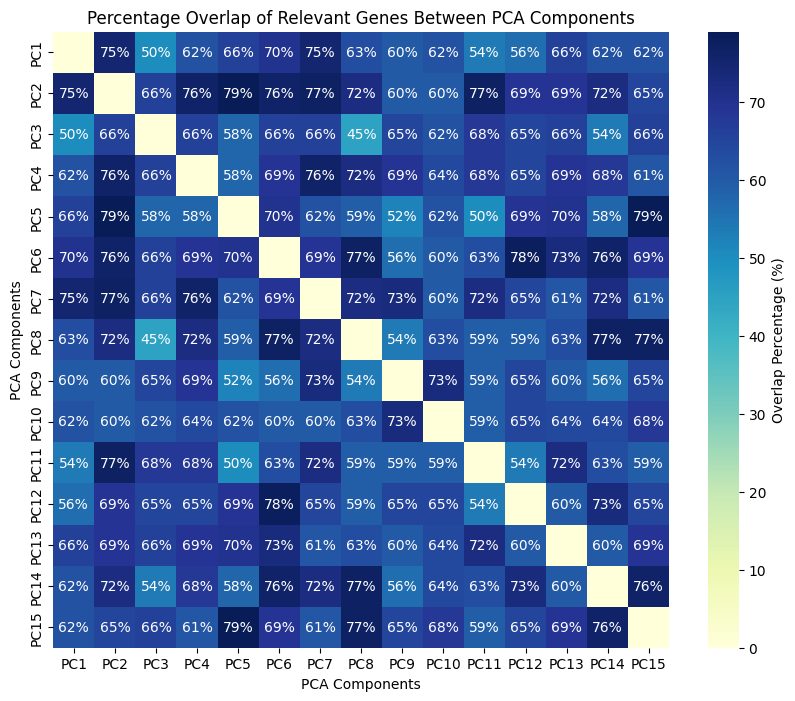

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assume overlap_counts is generated as per the previous code
# We also need the total number of relevant genes for each PC
total_genes_per_pc = {pc: len(genes) for pc, genes in relevant_genes_per_pc.items()}

# Calculate the overlap percentage between each pair of PC components
overlap_percentage = {}
for pc_i in range(1, n_components_75 + 1):
    pc_i_genes = set(relevant_genes_per_pc[f"PC{pc_i}"])
    for pc_j in range(pc_i + 1, n_components_75 + 1):
        pc_j_genes = set(relevant_genes_per_pc[f"PC{pc_j}"])
        overlap_count = len(pc_i_genes & pc_j_genes)
        min_total_genes = min(
            total_genes_per_pc[f"PC{pc_i}"], total_genes_per_pc[f"PC{pc_j}"]
        )
        # Calculate the overlap percentage
        overlap_percentage[f"PC{pc_i} & PC{pc_j}"] = int(
            (overlap_count / min_total_genes) * 100
        )  # Percentage as integer

# Convert overlap_percentage dictionary to a DataFrame for heatmap visualization
overlap_percentage_df = pd.DataFrame(
    0,
    index=[f"PC{i}" for i in range(1, n_components_75 + 1)],
    columns=[f"PC{i}" for i in range(1, n_components_75 + 1)],
)

for pair, percent in overlap_percentage.items():
    pc_i, pc_j = pair.split(" & ")
    overlap_percentage_df.loc[pc_i, pc_j] = percent
    overlap_percentage_df.loc[pc_j, pc_i] = (
        percent  # Mirror the percentage for both (i, j) and (j, i)
    )

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))


# Custom function to format annotations with '%'
def percent_format(val):
    return f"{int(val)}%" if val > 0 else ""


# Create a heatmap with annotated overlap percentages without decimals
sns.heatmap(
    overlap_percentage_df,
    annot=overlap_percentage_df.applymap(percent_format),
    fmt="",
    cmap="YlGnBu",
    square=True,
    cbar_kws={"label": "Overlap Percentage (%)"},
)
plt.title("Percentage Overlap of Relevant Genes Between PCA Components")
plt.xlabel("PCA Components")
plt.ylabel("PCA Components")

In [15]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to filter out repetitive genes (Soham's method)
def filter_genes(data, threshold=0.01):
    """Filters genes that have little variance across samples."""
    variances = data.var(axis=0)
    filtered_data = data.loc[:, variances > threshold]
    return filtered_data

# Sidebar to upload file
st.sidebar.title("Upload Your Data")
uploaded_file = st.sidebar.file_uploader("Upload CSV File", type=["csv"])

if uploaded_file is not None:
    # Read the uploaded file
    raw_data = pd.read_csv(uploaded_file)
    st.write("Raw Data:")
    st.write(raw_data)

    # Filter the genes based on variance
    st.write("Filtered Data (After Removing Repetitive Genes):")
    filtered_data = filter_genes(raw_data)
    st.write(filtered_data)

    # PCA Analysis
    pca = PCA()
    pca.fit(filtered_data)
    explained_variance = pca.explained_variance_ratio_

    # Variance Explained Plot
    st.write("Variance Explained by Each Number of Principal Components:")
    fig, ax = plt.subplots()
    ax.plot(np.cumsum(explained_variance))
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('Cumulative Explained Variance')
    st.pyplot(fig)

    # Slider for PCA Visualization
    st.write("Select Number of Principal Components for Visualization:")
    num_pcs = st.slider("Number of Principal Components", 1, min(len(filtered_data.columns), len(filtered_data)), 2)

    # Perform PCA with selected number of components
    pca_selected = PCA(n_components=num_pcs)
    pca_transformed = pca_selected.fit_transform(filtered_data)

    # Display transformed PCA data
    st.write(f"PCA Transformed Data with {num_pcs} Components:")
    st.write(pd.DataFrame(pca_transformed, columns=[f"PC{i+1}" for i in range(num_pcs)]))

    # PCA Scatter Plot
    if num_pcs >= 2:
        st.write("PCA Scatter Plot:")
        fig, ax = plt.subplots()
        ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], alpha=0.5)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        st.pyplot(fig)
else:
    st.write("Please upload a dataset to get started.")


2024-12-04 15:50:47.507 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 15:50:47.540 
  command:

    streamlit run /Users/islamtayeb/.pyenv/versions/3.13.0/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-12-04 15:50:47.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 15:50:47.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 15:50:47.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 15:50:47.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 15:50:47.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 15:50:47.